In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
def sliding_average(data, window_size):
    """Calculate the sliding (moving) average of a dataset with edge handling."""
    pad_width = window_size // 2
    padded_data = np.pad(data, pad_width, mode='edge')
    smoothed_data = np.convolve(padded_data, np.ones(window_size) / window_size, mode='valid')
    return smoothed_data

In [3]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/.dependencies/pyplot-perso")
from plttools import PltTools
path_figures = current_path # git_path + "/figures/"
path_data = git_path + "/.dependencies/lammpstutorials-inputs/"+path_in_folder.split('/')[-2]+"/"

In [ ]:
color0_light = np.array([0.5, 0.5, 0.5])
color1_light = np.array([1, 0.682, 0.286])
color2_light = np.array([0.008, 0.294, 0.478])
color3_light = np.array([0.267, 0.647, 0.761])

color0_dark = np.array([0.5, 0.5, 0.5])
color1_dark = np.array([1, 0.8, 0.5])
color2_dark = np.array([0.24, 0.58, 1.0])
color3_dark = np.array([0.4, 0.75, 0.85])

colors_light = {
    "color0": color0_light,
    "color1": color1_light,
    "color2": color2_light,
    "color3": color3_light,
}

colors_dark = {
    "color0": color0_dark,
    "color1": color1_dark,
    "color2": color2_dark,
    "color3": color3_dark,
}

In [5]:
log = lammps_logfile.File(path_data + "unbreakable.log")
timestep = 1 # fs
time_0 = log.get("Step", run_num=0)
TotEng_0 = log.get("TotEng", run_num=0) # Kcal/mol
Lcnt_0 = log.get("v_Lcnt", run_num=0) # Angstrom
time_1 = log.get("Step", run_num=1)
TotEng_1 = log.get("TotEng", run_num=1) # Kcal/mol
Lcnt_1 = log.get("v_Lcnt", run_num=1) # Angstrom
time_0 /= 1000 # ps
time_1 /= 1000 # ps
TotEng_0 /= 1000 # Mcal/mol
TotEng_1 /= 1000 # Mcal/mol

In [6]:
#smoothed_time = sliding_average(time, 5)
#TotEng = sliding_average(TotEng, 5)
#Lcnt = sliding_average(Lcnt, 5)
#Fcnt = sliding_average(Fcnt, 5)

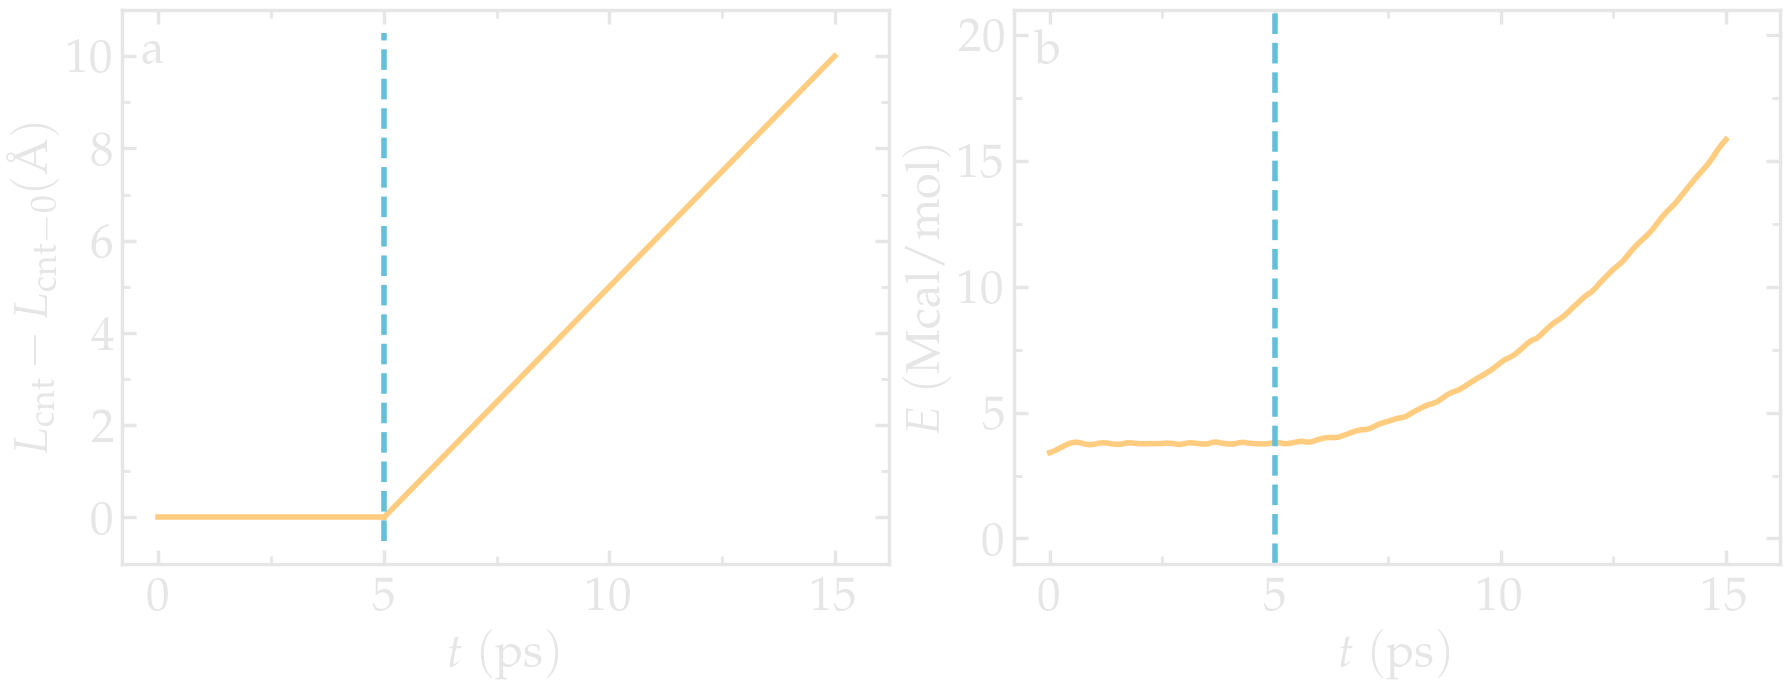

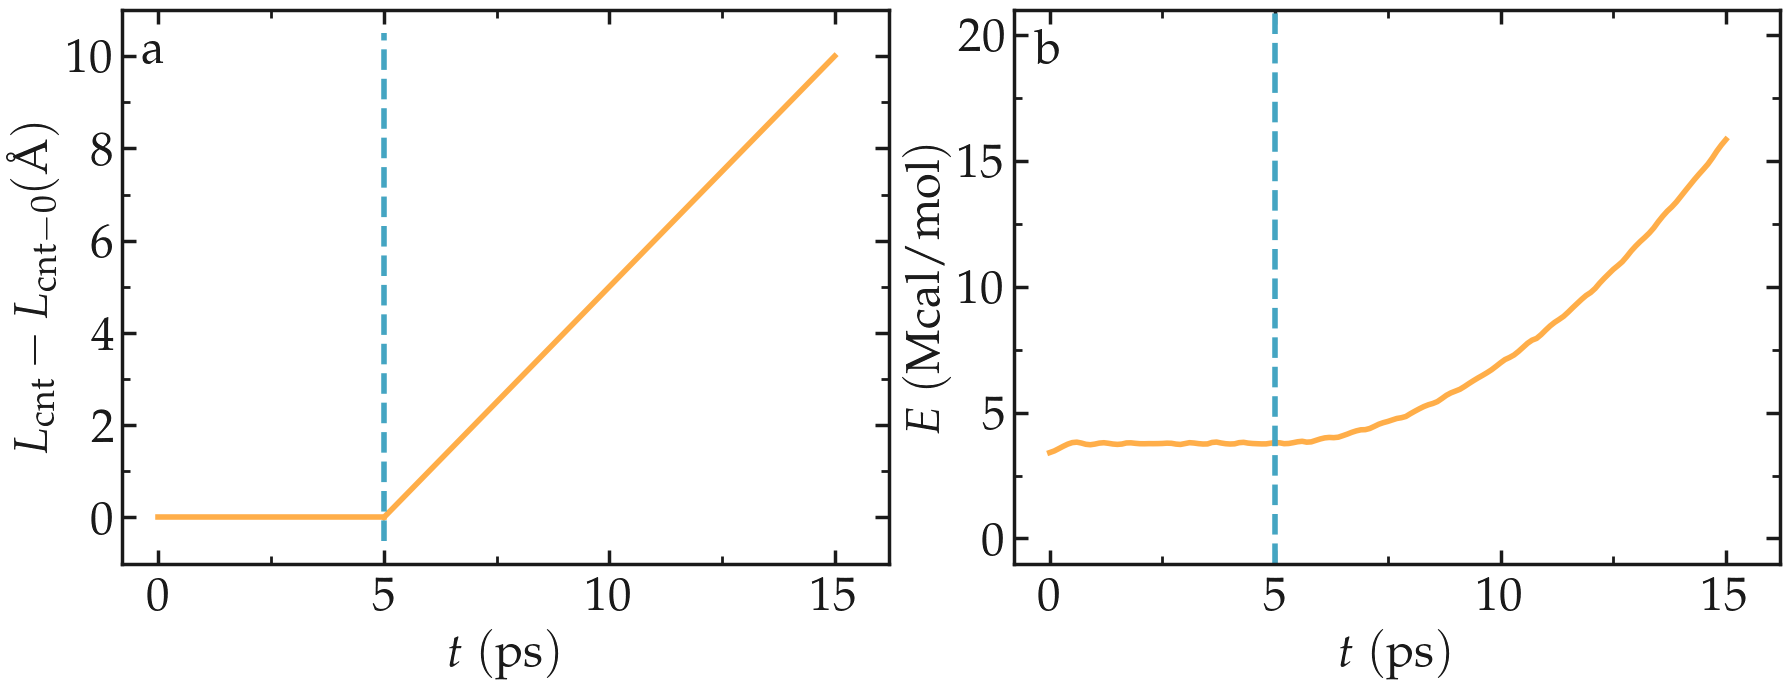

In [9]:
filename = "CNT-unbreakable-length-energy"

for dark_mode in [True, False]:

    colors = colors_dark if dark_mode else colors_light
    globals().update(colors)

    # Initialise figure
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,7), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_colone=2)
    # Panel a
    myplt.add_panel()
    myplt.add_plot(x = time_0, y = Lcnt_0-Lcnt_0[0], type = "plot", linewidth_data = 3,
                marker = "-", data_color = color1, markersize = 12)
    myplt.add_plot(x = time_1, y = Lcnt_1-Lcnt_0[0], type = "plot", linewidth_data = 3,
                marker = "-", data_color = color1, markersize = 12)
    x = np.linspace(-0.5, 10.5)
    myplt.add_plot(x = x*0+5, y = x, type = "plot", linewidth_data = 1.5,
                marker = "--", data_color = color3, markersize = 12)
    myplt.complete_panel(ylabel = r'$L_\mathrm{cnt} - L_\mathrm{cnt-0} \mathrm{(\AA)}$',
                        xlabel = r'$t~\mathrm{(ps)}$',
                        xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 18, 5), y_ticks=np.arange(0, 11, 2),
                    x_boundaries=(-0.8, 16.2), y_boundaries=(-1, 11))
    # Panel b
    myplt.add_panel()
    myplt.add_plot(x = time_0, y = TotEng_0, type = "plot", linewidth_data = 3,
                marker = "-", data_color = color1, markersize = 12)
    myplt.add_plot(x = time_1, y = TotEng_1, type = "plot", linewidth_data = 3,
                marker = "-", data_color = color1, markersize = 12)
    x = np.linspace(-1, 21)
    myplt.add_plot(x = x*0+5, y = x, type = "plot", linewidth_data = 1.5,
                marker = "--", data_color = color3, markersize = 12)
    myplt.complete_panel(ylabel = r'$E ~ \mathrm{(Mcal/mol)}$',
                        xlabel = r'$t~\mathrm{(ps)}$',
                        xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 18, 5), y_ticks=np.arange(0, 25, 5),
                    x_boundaries=(-0.8, 16.2), y_boundaries=(-1, 21))
    # Print figure
    myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = path_figures)

In [8]:
stress_strain = np.loadtxt("unbreakable.dat")
strain = sliding_average(stress_strain[:,0], 50)
stress = sliding_average(stress_strain[:,1], 50)

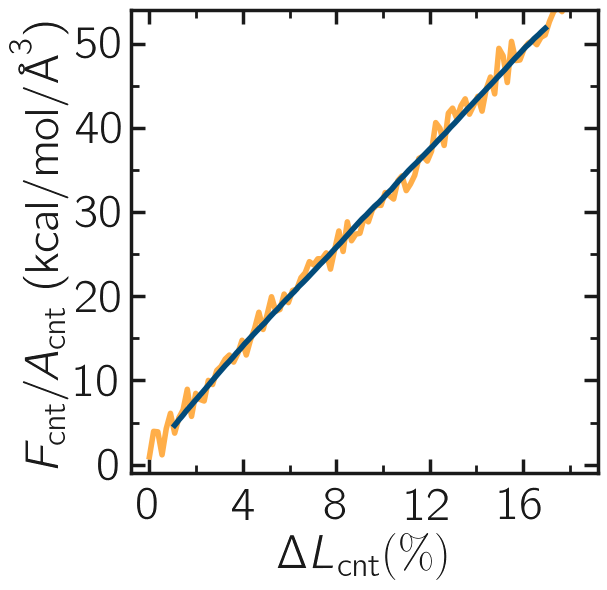

In [9]:
filename = "CNT-unbreakable-stress-strain"
# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (11,6), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=2)
# Panel a
myplt.add_panel()
myplt.add_plot(x = stress_strain[:,0], y = -stress_strain[:,1], type = "plot", linewidth_data = 3,
               marker = "-", data_color = color1, markersize = 12)
myplt.add_plot(x = strain, y = -stress, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.complete_panel(ylabel = r'$F_\mathrm{cnt}/A_\mathrm{cnt} ~ (\mathrm{kcal/mol/\AA}^3)$',
                     xlabel = r'$\Delta L_\mathrm{cnt} \textrm{(\%)}$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 20, 4), y_ticks=np.arange(0, 55, 10),
                   x_boundaries=(-0.8, 19.2), y_boundaries=(-1, 54))
# Print figure
# myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)